# App Behavior Classifier                       

Empresa possui um aplicativo mobile, onde fornece funções gratuitas e pagas.

O time de marketing digital da empresa possui dados de alguns usuários que acessaram o sistema, incluindo se os mesmos realizaram a assinatura do conteúdo pago ou não.

Através dos dados fornecidos, o contratuante deseja realizar a predição de usuários que não são tão favoráveis a comprar o aplicativo, diante do caso verdadeiro seria realizada uma abordagem do time, oferecendo uma proposta de assinatura com desconto e condições especiais.

# Imports básicos

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1.Dados

In [2]:
data = pd.read_csv('data/appdata10.csv')

In [3]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


## 1.1 Informações genéricas dos dados

In [4]:
data.shape

(50000, 12)

In [5]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [6]:
'''Obtendo os dados numéricos
Obs.: Destaque para a coluna 'hour' - A mesma tem como única função apresentar a hora,
como esta informação se apresenta em uma timestamp, a qual minutos e segundos não 
nenhuma revelância, coluna é destacada como categórica. Vamos mudar isso pois esse
atributo pode ser muito importante para o nosso modelo'''

# Literalmente cortamos todos os outros dados presentes na coluna, ficando somente 
# com a representação da hora como um número inteiro
data['hour'] = data['hour'].str.slice(1,3).astype(int)
numerical_data = [col for col in data.columns if data[col].dtype in ['float64', 'int64', 'int']]

# Obtendo os dados categóricos
categorical_data = [col for col in data.columns if data[col].dtype == object]

## 1.2 Dados categóricos

In [7]:
data[categorical_data].head()

,first_open,screen_list,enrolled_date
0,2012-12-27 02:14:51.273,"idscreen,joinscreen,Cycle,product_review,ScanP...",NaN
1,2012-12-02 01:16:00.905,"joinscreen,product_review,product_review2,Scan...",NaN
2,2013-03-19 19:19:09.157,"Splash,Cycle,Loan",NaN
3,2013-07-05 16:08:46.354,"product_review,Home,product_review,Loan3,Finan...",2013-07-05 16:11:49.513
4,2013-02-26 18:50:48.661,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",2013-02-26 18:56:37.841


## 1.3 Dados Numéricos

In [8]:
df_numerical = data[numerical_data]

In [9]:
df_numerical.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,15,0,0,0,0
1,333588,6,1,24,13,0,0,0,0
2,254414,1,19,23,3,0,1,0,1
3,234192,4,16,28,40,0,0,1,0
4,51549,1,18,31,32,0,0,1,1


### 1.3.1 Informações sobre os dados numéricos

In [10]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# 2. Visualização dos dados

## 2.1 Heatmap

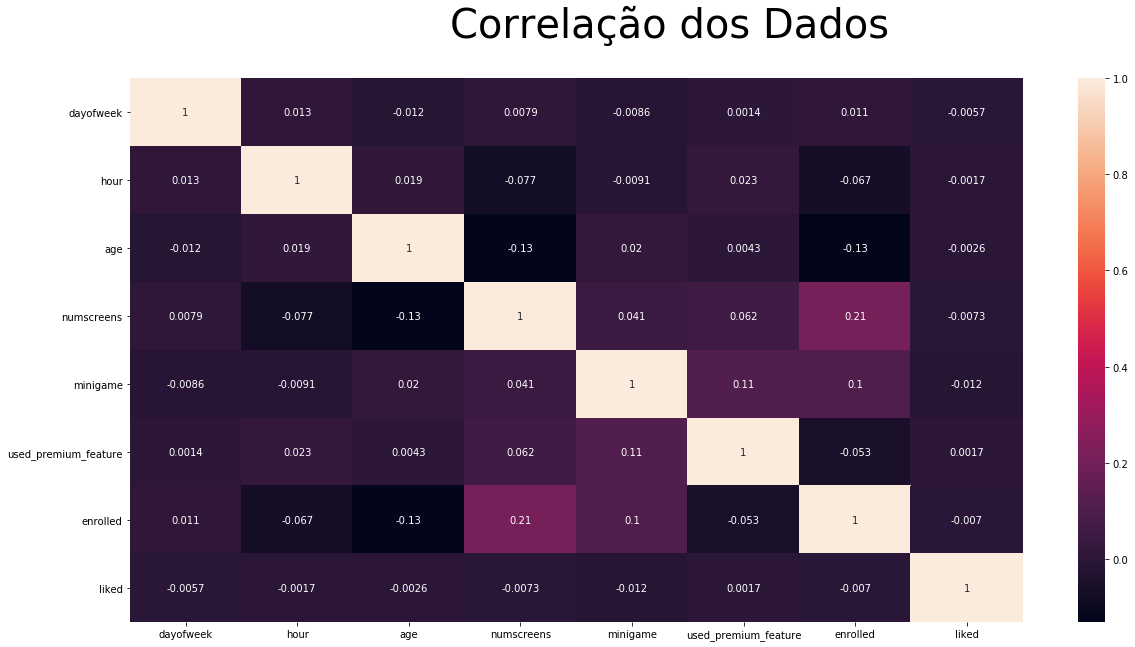

In [11]:
plt.figure(figsize=(20,10))
plt.suptitle("Correlação dos Dados", fontsize=40)
sns.heatmap(df_numerical.drop(columns=['user']).corr(), annot=True)

In [12]:
df_data_visualization = data.drop(columns=['user', 'enrolled', 'first_open', 'enrolled_date', 'screen_list'])

In [13]:
columns_to_visualize = df_data_visualization.columns

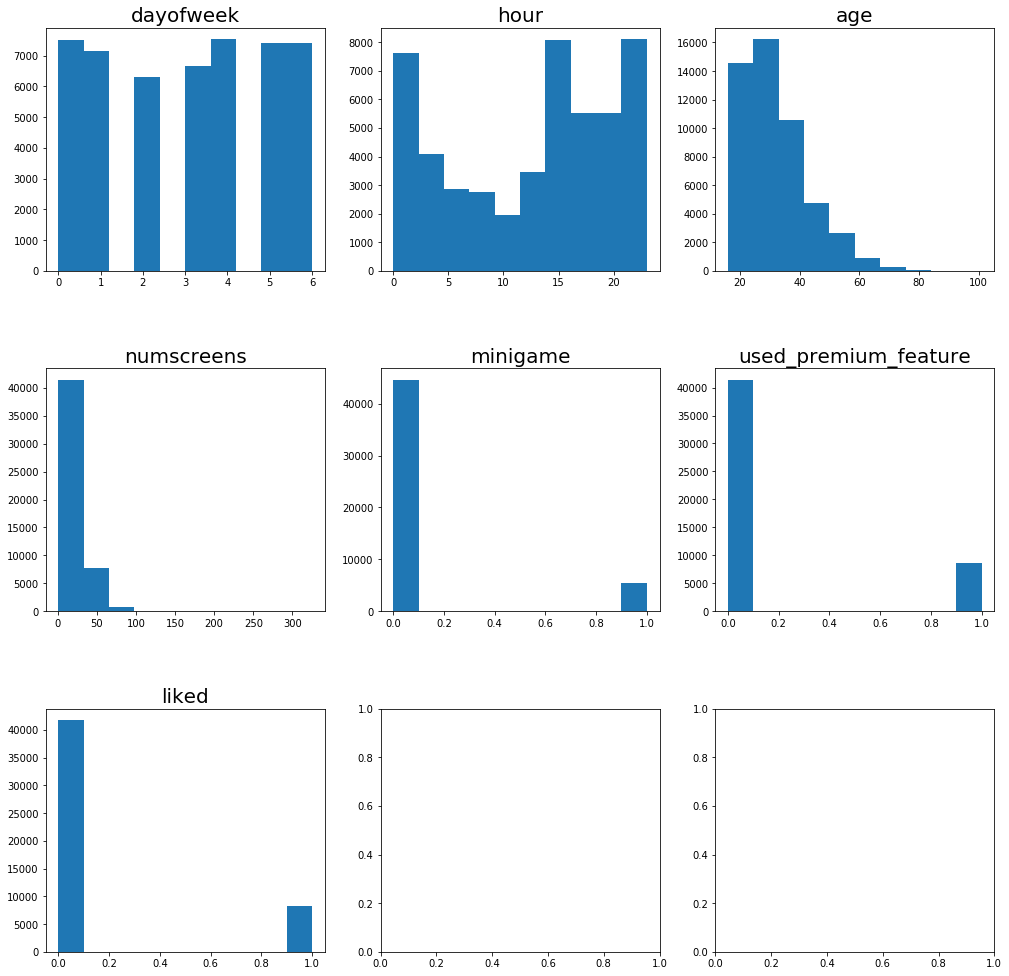

In [14]:
#Definindo o tamanho do grid de imagens
grid_length = 3
grid_width = 3

# A função subplots() retorna uma figure object e os axes do mesmo
# com o uso dos axes é possível preencher uma posição pré-definida 
# no que será apresentado como um grid de imagens

fig, axes = plt.subplots(grid_length, grid_width, figsize=(17,17))

axes = axes.ravel()


for i in np.arange(0, len(columns_to_visualize)):    
    axes[i].hist(df_data_visualization[columns_to_visualize[i]]) 
    axes[i].set_title(columns_to_visualize[i], fontsize = 20)
    
plt.subplots_adjust(hspace=0.4)    

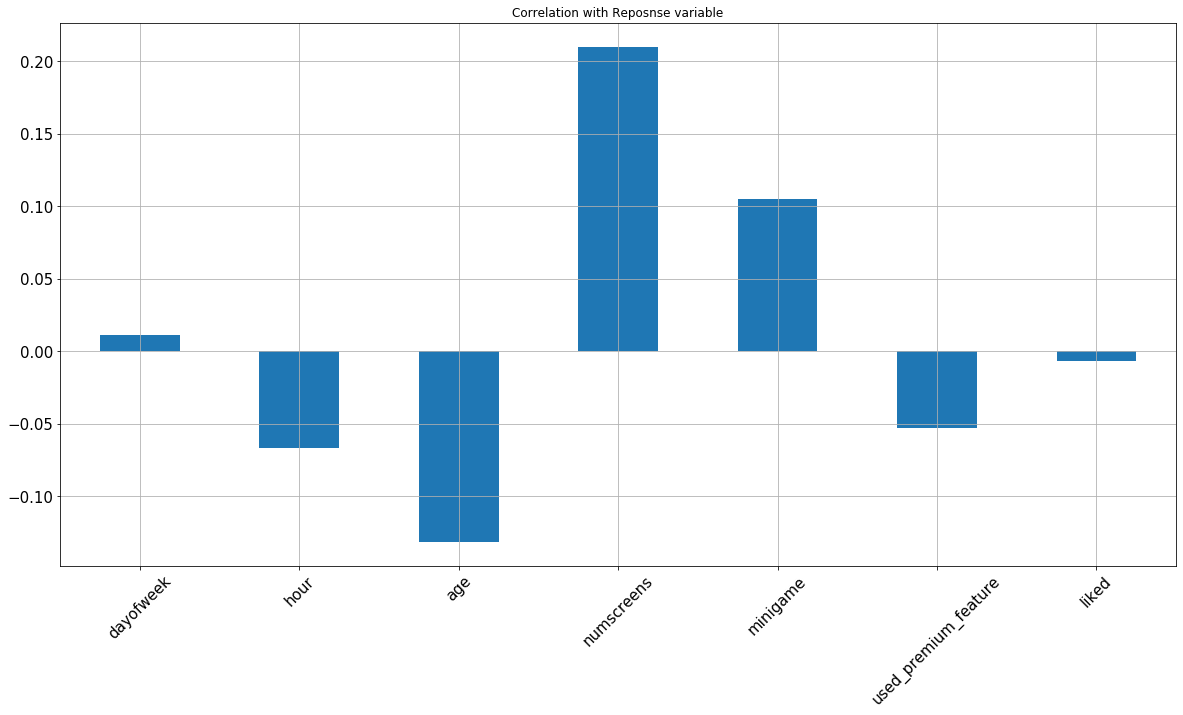

In [15]:
## Correlation with Response Variable
df_data_visualization.corrwith(data.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)

É possível reparar que a feature numscreens tem bastante relevância diante da aquisição do aplicativo ou não

Esta coluna é diretamente proporcional a variavel que indica a resposta ( y em questão), 'enrolled'

Já a coluna 'age' é inversamente proporcional, indicando que pessoas novas engajam mais na aquisição do aplicativo

# 3. Feature Engineering

In [17]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


## 3.1 Features do tipo data

### 3.1.1 Analisando se existem ocorrências de valores vazios

In [21]:
data['first_open'].isnull().sum()

0

In [22]:
data['enrolled_date'].isnull().sum()

18926

In [23]:
from dateutil import parser

data['first_open'] = [parser.parse(row_date) for row_date in data['first_open']]
data['enrolled_date'] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in data['enrolled_date']]

### 3.2.1 Criando feature com o delta das datas

In [24]:
# timedelta64 irá calcular a diferenca do tempo em horas( sintaxe = [h])
data['hours_to_buy'] = (data['enrolled_date'] - data['first_open']).astype('timedelta64[h]')

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

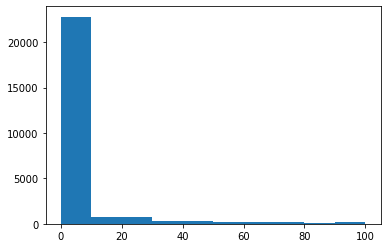

In [32]:
#plt.hist(data['hours_to_buy'].dropna())
#plt.hist(data['hours_to_buy'].dropna(), range=[0,500])
plt.hist(data['hours_to_buy'].dropna(), range=[0,100])

In [37]:
data.loc[data['hours_to_buy'] > 48, 'enrolled'] = 0

In [39]:
data = data.drop(columns = ['enrolled_date', 'hours_to_buy', 'first_open'])

In [40]:
data.shape

(50000, 10)

In [41]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

## 3.2 screen_list

### 3.2.1 One-Hot-Enconding as screen_lists que mais se destacam
O Project Leader entregou para você e para o seu time um arquivo de extensão .csv, no qual contém as telas mais usadas e relevantes para o projeto.

In [54]:
screens = pd.read_csv('data/top_screens.csv').top_screens.values

In [48]:
data['screen_list'] = data['screen_list'] + ','

In [55]:
screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [56]:
for screen in screens:
    data[screen] = data['screen_list'].str.contains(screen).astype(int)
    data['screen_list'] = data['screen_list'].replace(screen + ', ', '')

In [59]:
data['other'] = data['screen_list'].str.count(',')

In [63]:
data = data.drop(columns =['screen_list'])

In [64]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,13
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,17
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,19


### 3.2.2 Realizando agrupamento das colunas

Como os features que estão sendo trabalhados são telas, em aplicativos mobile existem telas que fazem parte de um grupo, como se houvessem telas pais e telas filhas.

Para isso o PL novamente nos retornou informações sobre quais são os grupos de telas que foram apresentados nesse arquivo .csv

In [65]:
# Telas de SAVING
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

data['SavingCount'] = data[savings_screens].sum(axis=1)
data = data.drop(columns = savings_screens)

# Telas de CREDIT
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]

data['CreditCount'] = data[cm_screens].sum(axis=1)
data = data.drop(columns = cm_screens)

# Telas de CC
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]

data['CCCount'] = data[cc_screens].sum(axis=1)
data = data.drop(columns = cc_screens)


#Telas de LOAN
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data['LoanCount'] = data[loan_screens].sum(axis=1)
data = data.drop(columns = loan_screens)

In [67]:
data.shape

(50000, 50)

In [69]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CreditCount,CCCount,LoanCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,12.983120,0.365020,1.291460,0.178940,1.321180
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,7.096628,1.405511,1.582378,0.618877,0.966127
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,2.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,2.000000,0.000000,2.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,79.000000,10.000000,5.000000,3.000000,3.000000


## 3.3 Pré-Processamento de Dados

### 3.3.1 Gerando split de dados para treinamento e análise do modelo

In [115]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['enrolled'])
y = data['enrolled']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 0)

In [99]:
X_train.shape

(40000, 49)

In [100]:
X_valid.shape

(10000, 49)

Para um melhor desempenho no trainamento iremos separar os dados dos usuários, vendo que não tende a fazer nada além de tornar o processo mais custos e talvez até mesmo mais confuso para o aprendizado da máquina

In [116]:
id_train = X_train['user']
X_train = X_train.drop(columns = ['user'])

id_valid = X_valid['user']
X_valid = X_valid.drop(columns = ['user'])

### 3.2.2 Feature Scaling

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train)
X_valid_2 = scaler.transform(X_valid)

In [118]:
# Ao  utilizar utilizar as funções de transformada do Scaler, retorna-se 
# um vetor de vetores, o que seria anteriomente um Pandas Dataframe
X_train_2

array([[-0.50496081,  1.00083719,  0.02552487, ..., -0.81765078,
        -0.28975779,  0.70067041],
       [-0.99738931,  1.13528016, -0.89803445, ...,  0.44600857,
        -0.28975779,  0.70067041],
       [-1.48981782, -1.15025039, -0.52861072, ...,  1.07783824,
         1.3200077 ,  0.70067041],
       ...,
       [-0.01253231, -0.88136444, -0.62096665, ..., -0.81765078,
        -0.28975779, -1.37078682],
       [ 0.4798962 ,  0.05973637, -0.43625479, ..., -0.81765078,
        -0.28975779, -1.37078682],
       [-0.99738931,  0.73195124, -1.08274631, ..., -0.81765078,
        -0.28975779,  0.70067041]])

In [119]:
# É possível instaciar um pandas dataframe com o retorno da função, 
# as consequentemente não possúiremos o nome das colunas...

X_train_2 = pd.DataFrame(scaler.fit_transform(X_train))
X_valid_2 = pd.DataFrame(scaler.transform(X_valid))

In [120]:
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.267943,-0.260877,-0.817651,-0.289758,0.700670
1,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.967162,-0.260877,0.446009,-0.289758,0.700670
2,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.685848,-0.260877,1.077838,1.320008,0.700670
3,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.142689,-0.260877,-0.817651,-0.289758,0.700670
4,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.283346,-0.260877,1.077838,-0.289758,-1.370787


In [121]:
# Para retornarmos os valores desejados iremos simplesmente realizar
# um De-Para com as colunas do dataframe que serviu de argumento para 
# as funções de transformada.

X_train_2.columns = X_train.columns.values
X_valid_2.columns = X_valid.columns.values

X_train_2.index = X_train.index.values
X_valid_2.index = X_valid.index.values

In [122]:
X_train_2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CreditCount,CCCount,LoanCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.267943,-0.260877,-0.817651,-0.289758,0.700670
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.967162,-0.260877,0.446009,-0.289758,0.700670
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.685848,-0.260877,1.077838,1.320008,0.700670
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.142689,-0.260877,-0.817651,-0.289758,0.700670
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.283346,-0.260877,1.077838,-0.289758,-1.370787


In [123]:
# Realizado o feature scaling podemos sobrescrever os data frames transformados
# sobre os data frames originais, ficando com as variáveis com nome mais simples ;)

X_train = X_train_2.copy()
X_valid = X_valid_2.copy()

In [124]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CreditCount,CCCount,LoanCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.267943,-0.260877,-0.817651,-0.289758,0.700670
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.967162,-0.260877,0.446009,-0.289758,0.700670
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.685848,-0.260877,1.077838,1.320008,0.700670
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.142689,-0.260877,-0.817651,-0.289758,0.700670
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.283346,-0.260877,1.077838,-0.289758,-1.370787


# Modelo

In [126]:
from sklearn.linear_model import LogisticRegression

# penalty = 'l1'
# Esta penalidade representa a também conhecinhda como Lasso, aonde ela realiza 
# uma penalização nos features de acordo com a sua correlação.

#  =====================================================================
#|| ESTE PARAMETRO É MUITO IMPORTANTE NOS PROJETOS QUE ENVOLVEM TELAS   ||
#|| DADO A CORRELAÇÃO DE VISUALIZAÇÃO DAS TELAS, ONDE PARA ENXERGAR UMA || 
#|| TELA EM ESPECÍFICO, É NECESSÁRIO VISUALIZAR OUTRAS.                 ||
# ======================================================================

model = LogisticRegression(random_state=0, penalty = 'l1', solver = 'liblinear')
model.fit(X_train, y_train)
pred = model.predict(X_valid)

In [130]:
from sklearn.metrics import classification_report

target_names = ['Enrolled', 'Not enrolled']
print(classification_report(y_valid, pred, target_names = target_names))

              precision    recall  f1-score   support

    Enrolled       0.77      0.76      0.77      5072
Not enrolled       0.76      0.77      0.76      4928

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



### Confusion Matrix

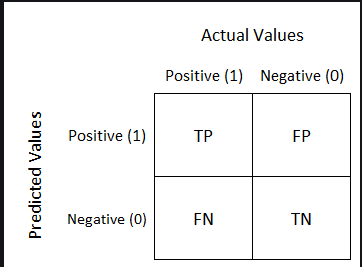


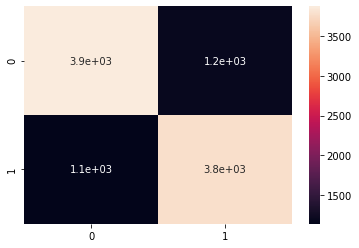

In [132]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, pred)
sns.heatmap(cm, annot=True)

## Cross Validation Score
### Aplicando K-Folders Cross Validation

In [134]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(estimator = model, X = X_train, y = y_train, cv=10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (cross_val.mean(), cross_val.std() * 2))

SVM Accuracy: 0.765 (+/- 0.010)


### Analisando o coeficiente do modelo diante das penalidades Lasso

In [135]:
pd.concat([pd.DataFrame(data.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(model.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.031447
1,hour,-0.008646
2,age,-0.156338
3,numscreens,-0.180523
4,minigame,-0.014260
5,used_premium_feature,-0.104481
6,enrolled,0.011127
7,liked,-0.139953
8,location,-0.204053
9,Institutions,0.584165


# HyperParemeter Tuning
## Grid Search

In [138]:
from sklearn.model_selection import GridSearchCV
import time

penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

grid_param = dict(C = C, penalty = penalty)


grid_search = GridSearchCV(estimator = model,
                           param_grid = grid_param,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = 4)


t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

print(f'Tempo de execução de GridSearch:{t1 - t0}')
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

print(f'Accuracy --> {rf_best_accuracy}')
print(f'Melhores parametros --> {rf_best_parameters}')

Tempo de execução de GridSearch:70.26999473571777
Accuracy --> 0.7646499999999999
Melhores parametros --> {'C': 10, 'penalty': 'l2'}


In [139]:
C = [5, 10, 20, 30, 40, 50, 60, 70]

grid_param = dict(C = C, penalty = penalty)


grid_search = GridSearchCV(estimator = model,
                           param_grid = grid_param,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = 4)


t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

print(f'Tempo de execução de GridSearch:{t1 - t0}')
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

print(f'Accuracy --> {rf_best_accuracy}')
print(f'Melhores parametros --> {rf_best_parameters}')

Tempo de execução de GridSearch:66.74542379379272
Accuracy --> 0.7646499999999999
Melhores parametros --> {'C': 10, 'penalty': 'l2'}
